# Intro to the popular Python package "Pandas"

This notebook covers the basics of manipulating data using Pandas.

**Authors**: Eric Kofman (ekofman@eng.ucsd.edu) and Pratibha Jagannatha (pjaganna@eng.ucsd.edu) 

**Credit**: Adapted from UCSD CMM262

# Import the pandas package. But nickname it 'pd' for short.

In [1]:
import pandas as pd

# Read a CSV (or TSV or anything!)

Here we are reading in a .tsv where the first column is "geneSymbol" and the second column is "chromosome"

In [2]:
pd.read_csv('../public-data/1_programming/data/gene_chrom.tsv', sep='\t')

,geneSymbol,chromosome
0,DDX11L1,chr1
1,OR4F5,chr1
2,DQ597235,chr1
3,DQ599768,chr1
4,LOC100132062,chr1
...,...,...
30614,U3,chrX
30615,SNORD112,chrX
30616,U7,chrX
30617,Mir_105,chrX


We want to save it to a variable so that we can manipulate it in other ways and CHECK IT OUT!

In [3]:
gene_chrom_table = pd.read_csv('../public-data/1_programming/data/gene_chrom.tsv', sep='\t')

# Check out your data! What are we working with here?

We can sneak a peek at just the first few rows...

In [4]:
gene_chrom_table.head()

,geneSymbol,chromosome
0,DDX11L1,chr1
1,OR4F5,chr1
2,DQ597235,chr1
3,DQ599768,chr1
4,LOC100132062,chr1


In [5]:
gene_chrom_table.head(2)

,geneSymbol,chromosome
0,DDX11L1,chr1
1,OR4F5,chr1


Or the last few rows...

In [6]:
gene_chrom_table.tail(3)

,geneSymbol,chromosome
30616,U7,chrX
30617,Mir_105,chrX
30618,U6,chrY


We can get a sense of the "shape" of the data...

In [7]:
gene_chrom_table.shape

(30619, 2)

^ This is what that means:

In [8]:
len(gene_chrom_table.columns)

2

In [9]:
len(gene_chrom_table)

30619

How about indexing into a row? 

In [10]:
gene_chrom_table['geneSymbol']

0             DDX11L1
1               OR4F5
2            DQ597235
3            DQ599768
4        LOC100132062
             ...     
30614              U3
30615        SNORD112
30616              U7
30617         Mir_105
30618              U6
Name: geneSymbol, Length: 30619, dtype: object

In [11]:
[gene_chrom_table.geneSymbol == 'TP53']

[0        False
 1        False
 2        False
 3        False
 4        False
          ...  
 30614    False
 30615    False
 30616    False
 30617    False
 30618    False
 Name: geneSymbol, Length: 30619, dtype: bool]

In [12]:
gene_chrom_table[gene_chrom_table.geneSymbol == 'TP53']

,geneSymbol,chromosome
11939,TP53,chr17


You can also directly use the index number

In [13]:
gene_chrom_table.loc[11939]

geneSymbol     TP53
chromosome    chr17
Name: 11939, dtype: object

In [14]:
gene_chrom_table[gene_chrom_table.geneSymbol.isin(['TP53', 'BRCA1'])]

,geneSymbol,chromosome
11939,TP53,chr17
12301,BRCA1,chr17


# OK let's read in another file. This one is a bit trickier

This file, which can be found at ../data/chrom_lengths.tsv, is actually *space-separated* and does not yet have column labels.  

In [15]:
chrom_length_table = pd.read_csv('../public-data/1_programming/data/chrom_lengths.tsv', sep=' ', names=['chrom', 'length'])

In [16]:
chrom_length_table.head()

,chrom,length
0,1,"249,698,942"
1,2,"242,508,799"
2,3,"198,450,956"
3,4,"190,424,264"
4,5,"181,630,948"


But! We have a problem. It looks like our lengths have actually been processed by pandas as strings instead of integers when they were loaded from the file. 

In [17]:
chrom_length_table.loc[0,'length']

'249,698,942'

In [18]:
type(chrom_length_table.loc[0,'length'])

str

In [19]:
type(249698942)

int

Python is **not** happy when we try to treat this value as an integer and use it in a summation

In [20]:
chrom_length_table.loc[0, 'length'] + 1

TypeError: can only concatenate str (not "int") to str

# Apply magic

### So let's make a new column where we convert each of these values into integers so we can do fancy things like graph them. We're going to be using the "apply" construct, which basically means we are defining a function to process each row and do something to it, then return the result of all of those functions.

For each value, we're going to want to replace the commas in the string with an empty string...

In [21]:
'249,698,942'.replace(',', '')

'249698942'

Then convert them to integers!

In [22]:
int('249,698,942'.replace(',', ''))

249698942

In [23]:
type(int('249,698,942'.replace(',', '')))

int

Et voila! We can treat them like numbers now.

In [24]:
int('249,698,942'.replace(',', '')) + 58

249699000

### Okay so here's our function definition

In [25]:
# Here's our function that will be "applied" to each row
def turn_string_number_into_integer(row):
    # Access the length from this row...
    string_length = row['length']
    # Convert the length into an integer...
    int_length = int(string_length.replace(',', ''))
    # And return the integer!
    return int_length
    

Now, when we "apply" the function to each row (note: axis=1 implies processing each row one at a time, otherwise the default is to process each column one at a time), we will be returned a new column with the function's results for each row!

In [26]:
chrom_length_table.apply(turn_string_number_into_integer, axis=1)

0     249698942
1     242508799
2     198450956
3     190424264
4     181630948
5     170805979
6     159345973
7     145138636
8     138688728
9     133797422
10    135186938
11    133275309
12    114364328
13    108136338
14    102439437
15     92211104
16     83836422
17     80373285
18     58617616
19     64444167
20     46709983
21     51857516
22    156040895
23     57264655
dtype: int64

And we have to make sure to save it back to our dataframe with a new name

In [27]:
chrom_length_table['numeric_length'] = chrom_length_table.apply(turn_string_number_into_integer, axis=1)

In [28]:
chrom_length_table.head()

,chrom,length,numeric_length
0,1,"249,698,942",249698942
1,2,"242,508,799",242508799
2,3,"198,450,956",198450956
3,4,"190,424,264",190424264
4,5,"181,630,948",181630948


Alright, we don't really need that old column anymore, do we? We can subset out just the columns we want to keep and save them into another dataframe object.

In [29]:
chrom_length_table[['chrom', 'numeric_length']]

,chrom,numeric_length
0,1,249698942
1,2,242508799
2,3,198450956
3,4,190424264
4,5,181630948
5,6,170805979
6,7,159345973
7,8,145138636
8,9,138688728
9,10,133797422


In [30]:
new_chrom_length_table = chrom_length_table[['chrom', 'numeric_length']]

In [31]:
new_chrom_length_table.head()

,chrom,numeric_length
0,1,249698942
1,2,242508799
2,3,198450956
3,4,190424264
4,5,181630948


Here's a useful pandas function you apply to this column now: 

In [32]:
new_chrom_length_table.numeric_length.mean()

128968693.33333333

Or you can get a plot of the lengths!

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-6ia4wd_4 because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


<AxesSubplot:>

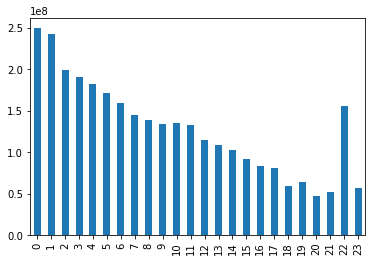

In [33]:
new_chrom_length_table.numeric_length.plot(kind='bar')

### but surprise surprise, it turns out that Pandas actually has a parameter built in to account for string conversion of numbers...

In [34]:
chrom_length_table = pd.read_csv('../public-data/1_programming/data/chrom_lengths.tsv', sep=' ', names=['chrom', 'length'], thousands=',')
chrom_length_table.head()

,chrom,length
0,1,249698942
1,2,242508799
2,3,198450956
3,4,190424264
4,5,181630948


# Gene Density

<img src="public-data/1_programming/img/geneDensityArticle2020.png">

Okay, so now we have a table of genes mapped to chromosomes (*chrom_length_table*), and a table telling us how long each chromosome is (*gene_chrom_table*).
Let's try to calculate **gene density per chromosome**. We will want to figure out the total number of genes on each chromosome normalized by how long that chromosome is

# Group by

A reminder of what our *gene_chrom_table* table looked like:

In [35]:
gene_chrom_table.head()

,geneSymbol,chromosome
0,DDX11L1,chr1
1,OR4F5,chr1
2,DQ597235,chr1
3,DQ599768,chr1
4,LOC100132062,chr1


In [36]:
gene_chrom_table.groupby('chromosome').count()

,geneSymbol
chromosome,
chr1,2735
chr10,1162
chr11,1817
chr12,1382
chr13,566
chr14,1048
chr15,1441
chr16,1148
chr17,1647


In [37]:
gene_count_by_chromosome = gene_chrom_table.groupby('chromosome').count()

In [38]:
gene_count_by_chromosome.columns = ['count']

You can do other things besides count, for example calculate the mean, variance, or standard deviation by group. Check out the documentation here to learn what else is possible: https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html

So this is now a table where we have grouped by chromosome and gotten a total of how many rows are associated with that chromosome.

In [39]:
gene_count_by_chromosome.head()

,count
chromosome,
chr1,2735
chr10,1162
chr11,1817
chr12,1382
chr13,566


And this is our table specifying lengths per chromosome:

In [40]:
chrom_length_table.head()

,chrom,length
0,1,249698942
1,2,242508799
2,3,198450956
3,4,190424264
4,5,181630948


In [41]:
### Now you try: get the mean, standard deviation, and variance of the length column in chrom_length_table

In [42]:
### Now you try: return a new column with length divided by two from chrom_length_table

### We want to put information both about the chromosome lengths and their gene counts into the same table. So we want to *join* information from both tables together into one table. To do this, we need to make sure that both tables have indices in the same format that can be cross-referenced.

<img src="../public-data/1_programming/img/chromNamesRant.png">

#### Anyways, we have to make sure that the chromosome names have the same format in both of our tables so we can combine them.

In [43]:
def add_chr(r):
    return 'chr' + r['chrom']


In [44]:
chrom_length_table['chromosome'] = chrom_length_table.apply(add_chr, axis=1)

In [45]:
chrom_length_table.head()

,chrom,length,chromosome
0,1,249698942,chr1
1,2,242508799,chr2
2,3,198450956,chr3
3,4,190424264,chr4
4,5,181630948,chr5


### And now, we can join the two tables on the "chromosome" column!

In [46]:
gene_count_by_chromosome.head()

,count
chromosome,
chr1,2735
chr10,1162
chr11,1817
chr12,1382
chr13,566


In [47]:
joined_table = chrom_length_table.join(gene_count_by_chromosome, on='chromosome')

In [48]:
joined_table

,chrom,length,chromosome,count
0,1,249698942,chr1,2735
1,2,242508799,chr2,1763
2,3,198450956,chr3,1484
3,4,190424264,chr4,1068
4,5,181630948,chr5,1233
5,6,170805979,chr6,1574
6,7,159345973,chr7,1469
7,8,145138636,chr8,1004
8,9,138688728,chr9,1237
9,10,133797422,chr10,1162


# Column-wise operations

To calculate the gene density, we want to divide the number of genes by the number of bp in each chromosome. We can use pandas' column-wise operpations to do the job!

In [49]:
joined_table['geneDensity'] = joined_table['count'] / joined_table['length']

In [50]:
joined_table.head()

,chrom,length,chromosome,count,geneDensity
0,1,249698942,chr1,2735,0.000011
1,2,242508799,chr2,1763,0.000007
2,3,198450956,chr3,1484,0.000007
3,4,190424264,chr4,1068,0.000006
4,5,181630948,chr5,1233,0.000007


Let's all set the overall dataframe's index to be the chromosome name

In [51]:
joined_table.index = joined_table['chromosome']

# This does the same thing as:

joined_table.index = joined_table.chromosome

In [52]:
joined_table.head()

,chrom,length,chromosome,count,geneDensity
chromosome,,,,,
chr1,1,249698942,chr1,2735,0.000011
chr2,2,242508799,chr2,1763,0.000007
chr3,3,198450956,chr3,1484,0.000007
chr4,4,190424264,chr4,1068,0.000006
chr5,5,181630948,chr5,1233,0.000007


# And let's plot these densities now to get a sense of how gene density varies across the genome

Text(0, 0.5, 'Gene Density')

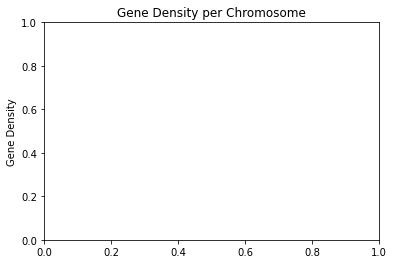

In [53]:
from matplotlib import pyplot as plt

plt.title('Gene Density per Chromosome')
plt.ylabel("Gene Density")
### Now you try: plot gene density as a bar plot. 

#### Confirmed: chromosome 19 has about double the number of genes per any given stretch of DNA as the rest of the genome